# COSE474-2024F Deep Learning HW 1
- **Chapter 2**
- 2021170964 박경빈

## 0.1. Installation


In [ ]:
!pip install d2l==1.0.3



---



## 2.1. Data Manipulation

### 2.1.1. Getting Started

In [ ]:
import torch

In [ ]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
x.numel()

12

In [ ]:
x.shape

torch.Size([12])

In [ ]:
X = x.reshape(3,4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
torch.randn(3,4)

tensor([[-0.0206, -0.1437, -0.1006,  0.4550],
        [-0.4674, -2.3346,  0.7079,  0.5532],
        [ 1.3217, -0.7262,  1.0253, -0.3928]])

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2. Indexing and Slicing

In [ ]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [ ]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 2.1.3. Operations

In [ ]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X.sum()

tensor(66.)

### 2.1.4. Broadcasting

In [ ]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [ ]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.5. Saving Memory

In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [ ]:
# Without [:] -- Different ID
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z = X + Y
print('id(Z):', id(Z))

id(Z): 140236852120768
id(Z): 140237176806336


In [ ]:
# With [:] -- Same ID
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140236852127008
id(Z): 140236852127008


In [ ]:
before = id(X)
X += Y
id(X) == before

True

### 2.1.6. Conversion to Other Python Objects

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 2.2 Data Preprocessing

### 2.2.1. Reading the Dataset

In [ ]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### 2.2.2. Data Preparation

In [ ]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [ ]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


### 2.2.3. Conversion to the Tensor Format

In [ ]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.3. Linear Algebra

### 2.3.1. Scalars

In [ ]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2. Vectors

$$\mathbf{x} =\begin{bmatrix}x_{1}  \\ \vdots  \\x_{n}\end{bmatrix}$$

In [ ]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [ ]:
x[2]

tensor(2)

In [ ]:
len(x)

3

In [ ]:
x.shape

torch.Size([3])

### 2.3.3. Matrices

$$\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}$$

In [ ]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [ ]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4. Tensors

In [ ]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5. Basic Properties of Tensor Arithmetic

In [ ]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

$$
\mathbf{A} \odot \mathbf{B} =
\begin{bmatrix}
    a_{11}  b_{11} & a_{12}  b_{12} & \dots  & a_{1n}  b_{1n} \\
    a_{21}  b_{21} & a_{22}  b_{22} & \dots  & a_{2n}  b_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1}  b_{m1} & a_{m2}  b_{m2} & \dots  & a_{mn}  b_{mn}
\end{bmatrix}.
$$

In [ ]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [ ]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6. Reduction

In [ ]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [ ]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [ ]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [ ]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [ ]:
A.sum(axis=[0, 1]) == A.sum()  # Same as A.sum()

tensor(True)

In [ ]:
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

### 2.3.7. Non-Reduction Sum

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [ ]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [ ]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

### 2.3.8. Dot Products

In [ ]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [ ]:
torch.sum(x * y)

tensor(3.)

### 2.3.9. Matrix–Vector Products

In [ ]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

### 2.3.10. Matrix–Matrix Multiplication

In [ ]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### 2.3.11. Norms

 **Euclidean norm:**
 $$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}.$$

In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

**Manhattan distance:**
$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$

In [ ]:
torch.abs(u).sum()

tensor(7.)

**Frobenius norm:**
$$\|\mathbf{X}\|_\textrm{F} = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$

In [ ]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 2.5. Automatic Differentiation

### 2.5.1. A Simple Function

In [ ]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [ ]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2. Backward for Non-Scalar Variables

In [ ]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3. Detaching Computation

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4. Gradients and Python Control Flow

In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [ ]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [ ]:
a.grad == d / a

tensor(True)

# Discussions & Exercises

### 2.1. Discussion

**Tensor**
- Used for storing and manipulating data
- Popularly used in Deep Learning
- Provides indexing, slicing, mathematic operations, broadcasting, memory-efficient assignment, and conversion to/from python objects

### 2.1. Exercises & My Own Experiments
1. Run the code in this section. Change the conditional statement X == Y to X < Y or X > Y, and then see what kind of tensor you can get.
2. Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?

**1. Run the code in this section. Change the conditional statement X == Y to X < Y or X > Y, and then see what kind of tensor you can get.**

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

In [ ]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
Y

tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

In [ ]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X < Y

tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X > Y

tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])



---



**2. Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?**



- Broadcasting doesn't work in 3 dimension if: Dimension with size of 1 Doesn't exist

In [ ]:
a = torch.arange(12).reshape((2, 3, 2))
b = torch.arange(18).reshape((3, 2, 3))

print('a:', a)
print('b:', b)
print('a+b:', a+b)

a: tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]]])
b: tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])


RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 2

- Broadcasting doesn't work in 3 dimension if: None of the dimensions match each other
- In the example below, $2 \neq 3, 3 \neq 1, 1 \neq 3$, thus makes an error

In [ ]:
a = torch.arange(6).reshape((2, 3, 1))
b = torch.arange(9).reshape((3, 1, 3))

print('a:', a)
print('b:', b)
print('a+b:', a+b)

a: tensor([[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]]])
b: tensor([[[0, 1, 2]],

        [[3, 4, 5]],

        [[6, 7, 8]]])


RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 0

- Broadcasting works in 3 dimension if:
1. At least one dimesion match each other.
2. Two tensors must each own a dimension of size 1.

In [ ]:
a = torch.arange(6).reshape((2, 3, 1))
b = torch.arange(6).reshape((2, 1, 3))
print('a:', a)
print('b:', b)
print('a+b:', a+b)

a: tensor([[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]]])
b: tensor([[[0, 1, 2]],

        [[3, 4, 5]]])
a+b: tensor([[[ 0,  1,  2],
         [ 1,  2,  3],
         [ 2,  3,  4]],

        [[ 6,  7,  8],
         [ 7,  8,  9],
         [ 8,  9, 10]]])


### 2.2. Discussion

Data Preprocessing might be challenging in real-world such as:
- Rather than arriving in a single CSV file, our dataset might be spread across **multiple files extracted from a relational database**, for example, e-commerce application
- Myriad data types might exist beyond just categorical and numeric, for example, **text strings, images, audio data, and point clouds**
- Advanced tools and efficient algorithms are required in order to prevent data processing from becoming the biggest bottleneck in the machine learning pipeline
- We must pay attention to data quality, since datasets are often **plagued by outliers**, **faulty measurements** from sensors, and **recording errors**, which must be addressed before feeding the data into any model

Data visualization tools such as **seaborn, Bokeh, or matplotlib** can help us to manually inspect the data

### 2.2. Exercises & My Own Experiments
1. Try loading datasets, e.g., Abalone from the UCI Machine Learning Repository and inspect their properties. What fraction of them has missing values? What fraction of the variables is numerical, categorical, or text?
2. Try indexing and selecting data columns by name rather than by column number. The pandas documentation on indexing has further details on how to do this.
3. How large a dataset do you think you could load this way? What might be the limitations? Hint: consider the time to read the data, representation, processing, and memory footprint. Try this out on your laptop. What happens if you try it out on a server?
4. How would you deal with data that has a very large number of categories? What if the category labels are all unique? Should you include the latter?
5. What alternatives to pandas can you think of? How about loading NumPy tensors from a file? Check out Pillow, the Python Imaging Library.



---



**1. Try loading datasets, e.g., Abalone from the UCI Machine Learning Repository and inspect their properties. What fraction of them has missing values? What fraction of the variables is numerical, categorical, or text?**

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
data = pd.read_csv(url, header=None)
print(data)

      0      1      2      3       4       5       6       7   8
0     M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4172  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4177 rows x 9 columns]


- **Properties:** Sex, Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight, Rings
- None of them has any missing values

- **Categorial property:** Sex
- **Numerical property (Continuous):** Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight
- **Numerical property (Integer):** Rings
- **Text property:** None



---



**2. Try indexing and selecting data columns by name rather than by column number. The pandas documentation on indexing has further details on how to do this.**

In [ ]:
column_labels = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
data.columns = column_labels

In [ ]:
inputs, targets = data[['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']], data['Rings']

In [ ]:
inputs

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
targets

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10




---



**3. How large a dataset do you think you could load this way? What might be the limitations? Hint: consider the time to read the data, representation, processing, and memory footprint. Try this out on your laptop. What happens if you try it out on a server?**

**My 16GB-RAM PC:**
- Small to medium datasets up to a few GB should load quickly, but not for larger datasets
- My Estimation: A DataFrame with 8 columns might use about 100-200 bytes per row(depending on data types). With 16GB RAM, you might be able to load around 80-160 million rows before running out of memory.
- For datasets approaching the RAM limit, even simple operations could cause swapping, severely impacting performance.
- Background processes and the OS also need memory, further limiting available space.

**A really good server (such as AWS):**
- Servers often have faster I/O capabilities and much bigger memory, allowing quicker data loading, and handling much larger datasets more efficiently.
- With more RAM space, servers can handle datasets 8-64 times larger than a 16GB PC, which could work with billions of rows, depending on the exact specifications.
- Furthermore, better CPUs and GPU acceleration allow for faster processing of large datasets.
- Efficiently use of memory with techniques like memory-mapped files or distributed processing frameworks.



---



**4. How would you deal with data that has a very large number of categories? What if the category labels are all unique? Should you include the latter?**

Yes, I would definitely use servers such as AWS to store & load a bunch of data safely & efficiently.
- Maybe *Amazon S3* for storing datas and files, or *Amazon SageMaker* due to its built-in algorithms and deep learning frameworks



---



**5. What alternatives to pandas can you think of? How about loading NumPy tensors from a file? Check out Pillow, the Python Imaging Library.**

**NumPy tensors:**
- NumPy arrays are more memory-efficient than pandas DataFrames for numerical data, and better for multi-dimensional tensors.
- However, it does not support alot of functionalities that are crutial for deep learning, so I might not use it for an alternative for pandas

**Pillow:**
- Pillow is known for its efficiency for loading, manipulating, and saving various image formats.
- However, Pillow is limited to 2D image data, which is not suitable for data manipulation or analysis.

Because of the importance of deep learning related tools / functionalities and ability to manipulate large dataframes, I would still use pandas for deep learning.

### 2.3. Discussion

- Scalars, vectors, matrices, and tensors are the basic mathematical objects used in linear algebra and have zero, one, two, and an arbitrary number of axes, respectively.
- Tensors can be sliced or reduced along specified axes via indexing, or operations such as sum and mean, respectively.
- Elementwise products are called Hadamard products. By contrast, dot products, matrix–vector products, and matrix–matrix products are not elementwise operations and in general return objects having shapes that are different from the the operands.
- Compared to Hadamard products, matrix–matrix products take considerably longer to compute (cubic rather than quadratic time).
- Norms capture various notions of the magnitude of a vector (or matrix), and are commonly applied to the difference of two vectors to measure their distance apart.
- Common vector norms include the $l_1$ and $l_2$ norms, and common matrix norms include the spectral and Frobenius norms.
- **The Frobenius norm behaves as if it were an $l_2$ norm of a matrix-shaped vector. Invoking the following function will calculate the Frobenius norm of a matrix.**

**Frobenius norm:**
$$\|\mathbf{X}\|_\textrm{F} = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$

### 2.3. Exercises & My Own Experiments
- **3 Examples of Frobenius Norm:**

In [ ]:
torch.ones((5, 5))

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
torch.norm(torch.ones((5, 5)))

tensor(5.)



---



In [ ]:
torch.rand(3, 4)

tensor([[0.8744, 0.1753, 0.6514, 0.1203],
        [0.3977, 0.7149, 0.5240, 0.0659],
        [0.4611, 0.6816, 0.0527, 0.6883]])

In [ ]:
torch.norm(torch.rand(3, 4))

tensor(1.8264)



---



In [ ]:
torch.diag(torch.tensor([1., 2., 3., 4.]))

tensor([[1., 0., 0., 0.],
        [0., 2., 0., 0.],
        [0., 0., 3., 0.],
        [0., 0., 0., 4.]])

In [ ]:
torch.norm(torch.diag(torch.tensor([1., 2., 3., 4.])))

tensor(5.4772)

### 2.5. Discussion

**Simple Function's Automatic Differentiation**
```
x = torch.arange(4.0)
y = 2 * torch.dot(x, x)
y.backward()
x.grad
x.grad == 4 * x
```
$$x=[x₁, x₂, x₃, x₄]$$

$$ y = 2 \cdot \text{dot}(x, x) = 2(x_1^2 + x_2^2 + x_3^2 + x_4^2) $$

If we use `y.backward()`,

$$ \frac{\partial y}{\partial x_1} = 2 \cdot 2x_1 = 4x_1 $$

$$ \frac{\partial y}{\partial x_2} = 2 \cdot 2x_2 = 4x_2 $$

$$ \frac{\partial y}{\partial x_3} = 2 \cdot 2x_3 = 4x_3 $$

$$ \frac{\partial y}{\partial x_4} = 2 \cdot 2x_4 = 4x_4 $$

Thus, `x.grad()` is like following:
$$ \nabla y = \begin{bmatrix}
\frac{\partial y}{\partial x_1} \
\frac{\partial y}{\partial x_2} \
\frac{\partial y}{\partial x_3} \
\frac{\partial y}{\partial x_4}
\end{bmatrix} = \begin{bmatrix}
4x_1 \
4x_2 \
4x_3 \
4x_4
\end{bmatrix} = 4x $$



---




```
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad
```
$$x=[x_1, x_2, x_3, x_4]$$
$$ y = \sum_{i=1}^4 x_i = x_1 + x_2 + x_3 + x_4 $$
If we use `y.backward()`,
$$ \frac{\partial y}{\partial x_1} = 1 $$
$$ \frac{\partial y}{\partial x_2} = 1 $$
$$ \frac{\partial y}{\partial x_3} = 1 $$
$$ \frac{\partial y}{\partial x_4} = 1 $$
Thus, `x.grad` is like following:
$$ \nabla y = \begin{bmatrix}
\frac{\partial y}{\partial x_1} \
\frac{\partial y}{\partial x_2} \
\frac{\partial y}{\partial x_3} \
\frac{\partial y}{\partial x_4}
\end{bmatrix} = \begin{bmatrix}
1 \
1 \
1 \
1
\end{bmatrix} = \mathbf{1} $$



---



**Backward for Non-Scalar Variables**
```
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad
```
Why is `y.sum().backward()` faster than `y.backward(gradient=torch.ones(len(y)))`?

**Case 1: `y.backward(gradient=torch.ones(len(y)))`**

$$ \frac{\partial y}{\partial x} = [2x_1, 2x_2, \dots, 2x_n] $$

Here, y is a vector, and for each element $y_i = x_i^2$, we calculate:

$$ \frac{\partial y_i}{\partial x_i} = 2x_i $$

and applying a multiplication with the gradient vector:

$$ \mathbf{1} \cdot [2x_1, 2x_2, \dots, 2x_n] = [2x_1, 2x_2, \dots, 2x_n] $$

**Case 2: `y.sum().backward()`**

$$ y_\text{sum} = \sum_{i=1}^{n} x_i^2 $$

This gives a scalar value, and then you compute the gradient of this scalar with respect to x. The gradient of the sum with respect to each element $x_i$ is:

$$ \frac{\partial y_\text{sum}}{\partial x_i} = 2x_i $$

This is computed directly without needing to pass through each element of y.



---



**Detaching Computation**
```
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u
```
$$ y = [x_0^2, x_1^2, x_2^2, x_3^2] = [0^2, 1^2, 2^2, 3^2] = [0, 1, 4, 9] $$

which makes

$$ u = [0, 1, 4, 9] $$

However, since `u = y.detach()` no gradient information is passed from `u` back to `y` or `x`.

$$ z = u * x = [0 * 0, 1 * 1, 4 * 2, 9 * 3] = [0, 1, 8, 27] $$

$$ z_\text{sum} = 0 + 1 + 8 + 27 = 36 $$

Then, if we apply `backward()`,

$$ \frac{\partial z_\text{sum}}{\partial x_i} = \frac{\partial}{\partial x_i} \left( \sum_{j=0}^3 u_j x_j \right) $$

where **$u_j$ is considered constant**. Thus,

$$ \frac{\partial z_\text{sum}}{\partial x_i} = u_i $$

$$ \nabla z_\text{sum} = [u_0, u_1, u_2, u_3] = [0, 1, 4, 9] $$

### 2.5. Exercises & My Own Experiments
3. In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?
4. Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.
5. Let $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.
6. Use the chain rule to compute the derivative $df/dx$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.

**3. In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this??**

**Gradients and Python Control Flow**
```
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a
```

Let's assume the loop iterates n times such that $b = a · 2^{n+1}$ after the loop finishes.

**Case 1: b.sum() > 0**
$$ c = a \cdot 2^{n+1} $$
$$ \frac{\partial c}{\partial a} = 2^{n+1} $$
$$ a.grad = \frac{\partial d}{\partial a} = 2^{n+1} = \frac{d}{a} $$
This is exactly what the expression a.grad == d / a represents.

**Case 2: b.sum() <= 0**
$$ c = 100 \cdot a \cdot 2^{n+1} $$
$$ \frac{\partial c}{\partial a} = 100 \cdot 2^{n+1} $$
$$ a.grad = \frac{\partial d}{\partial a} = 100 \cdot 2^{n+1} = \frac{d}{a} $$
This also satisfies the expression a.grad == d / a.



---



**4. Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.**

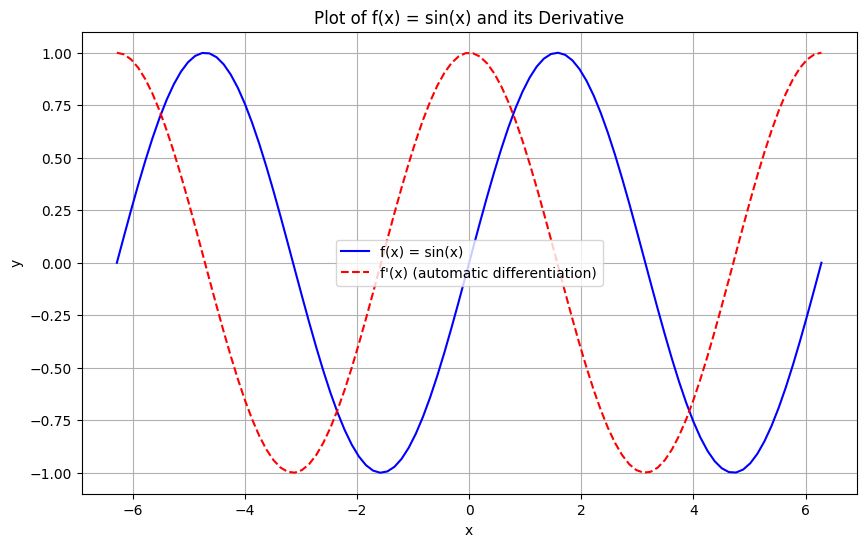

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return torch.sin(x)

x_values = torch.linspace(-2 * np.pi, 2 * np.pi, 100, requires_grad=True)
y_values = f(x_values)

y_values.sum().backward()
grad_values = x_values.grad

x_np = x_values.detach().numpy()
y_np = y_values.detach().numpy()
grad_np = grad_values.detach().numpy()

plt.figure(figsize=(10, 6))
plt.plot(x_np, y_np, label="f(x) = sin(x)", color='blue')
plt.plot(x_np, grad_np, label="f'(x) (automatic differentiation)", color='red', linestyle='--')

plt.title("Plot of f(x) = sin(x) and its Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.grid(True)
plt.show()




---



**5. Let** $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$.
**Write out a dependency graph tracing results from $x$ to $f(x)$.**

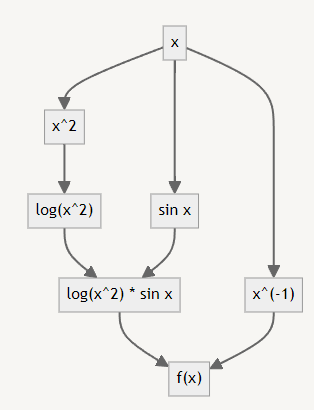

**6. Use the chain rule to compute the derivative  $df/dx$ of the aforementioned function, placing each term on the dependency graph that you constructed previously**

$$ f(x) = ((\log x^2) \cdot \sin x) + x^{-1} $$

The function has two main components:
$$ f_1(x) = (\log x^2) \cdot \sin x $$
$$ f_2(x) = x^{-1} $$

To find derivative of $ f_1(x) = (\log x^2) \cdot \sin x $ lets say:
$$ g(x) = \log x^2 $$
$$ h(x) = \sin x $$

$$ \frac{d}{dx} \left( g(x) \cdot h(x) \right) = g'(x) \cdot h(x) + g(x) \cdot h'(x) $$

$$ g'(x) = \frac{d}{dx} \left( 2 \log x \right) = \frac{2}{x} $$

$$ h'(x) = \cos x $$

$$ \frac{d}{dx} \left( (\log x^2) \cdot \sin x \right) = \frac{2}{x} \cdot \sin x + (\log x^2) \cdot \cos x $$

To find derivative $ f_2(x) = x^{-1} $,
$$ \frac{d}{dx} \left( x^{-1} \right) = -x^{-2} = -\frac{1}{x^2} $$

Thus, the final result:
$$ \frac{df}{dx} = \frac{2}{x} \cdot \sin x + (\log x^2) \cdot \cos x - \frac{1}{x^2} $$.

Which is just the opposite path of the below image:

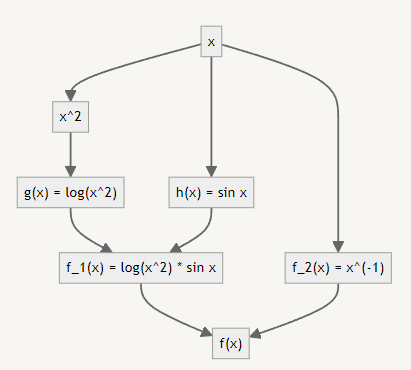